
# Project: Data Exploration of TMDB movies dataset with Python

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The dataset selected for analysis is TMDB movies dataset. This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. Following are the questions to be explored in this project.
* Which genre of the movies is more in number and which is less in number?
* How are the revenue across each genre distributed in the year 2015?
* Overall which genre has generated more revenue and which is the least compared to the budget?
* What is the relationship between revenue and vote_average of the movies?
* What is the effect of runtime of the movies on the revenue generated by the movies?
* What is the trend of budget, popularity and vote average of the movies over the years?

In [1]:
#import statements for all the packages that we will be using throughout 
#project


%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



<a id='wrangling'></a>
## Data Wrangling

> In this section we will clean the dataset and make it ready for data anlysis.


### General Properties

    

In [2]:
# Loading data to the dataframe and print a few lines
df=pd.read_csv('tmdb-movies.csv')
df.head()


id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      http://www.jurassicworld.com/   Colin Trevorrow   
1                        http://www.madmaxmovie.com/     George Miller   
2     http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   
3  http://www.starwars.com/films/star-wars-episod...       J.J. Abrams   
4                           http://www.furious7.com/         James Wan   

                         tagline      ...       \
0              The park is open.      ...        
1             What a Lovely Day.      ...        
2     One Choice Can Destroy You      ...        
3  Every generation has a story.      ...        
4            Vengeance Hits Home      ...        

                                            overview runtime  \
0  Twenty-two years after the events of Jurassic ...     124   
1  An apocalyptic story set in the furthest reach...     120   
2  Beatrice Prior must confront her inner demons ...     119   
3  Thirty years after defeating the Galactic Empi...     136   
4  Deckard Shaw seeks revenge against Dominic Tor...     137   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15       6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15       2480   
3          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15       5292   
4  Universal Pictures|Original Film|Media Rights ...       4/1/15       2947   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08  
3           7.5          2015  1.839999e+08  1.902723e+09  
4           7.3          2015  1.747999e+08  1.385749e+09  

[5 rows x 21 columns]

> By looking at the above resultant dataset we can see that the columns genres, cast and production_companies have multiple values seperated by pipe "|". It is better to split those cells into individual values for our analysis which will be done in the below steps.

> Firstly we will create 3 different dataframes for each column to be split by concatenating id column and the corresponding column for each column.

In [3]:
#Concatinating id column with the columns to be split to create 
#new dataframe which we can use for our split operation

df_genres=pd.concat([df['id'], df['genres']], axis=1)
df_cast=pd.concat([df['id'], df['cast']], axis=1)
df_prod_comp=pd.concat([df['id'], df['production_companies']], axis=1)

#Dropping na values if any in the created dataframes

df_genres=df_genres.dropna()
df_cast=df_cast.dropna()
df_prod_comp=df_prod_comp.dropna()


> To achieve splitting of the column values we will need a function which will take the above created dataframes and return the splitted column values which can be then joined with the original dataframe using ID column.

In [ ]:
#function to split the column values 

def splitdf(df_genres,value):
    df_empty = pd.DataFrame()
    for row in df_genres.iterrows():
        movie_id=row[1][0]
        movie_genre=row[1][1]
        movie_genre_arr=movie_genre.split('|')
        
        for i in movie_genre_arr:
            df_empty=df_empty.append({'ID':movie_id,value: i}, ignore_index=True)
    return(df_empty)
    
        
df_genre_split=splitdf(df_genres,'genres')
df_genre_split['ID']=df_genre_split['ID'].astype(np.int64)
df_cast_split=splitdf(df_cast,'cast')
df_cast_split['ID']=df_cast_split['ID'].astype(np.int64)
df_prod_comp_split=splitdf(df_prod_comp,'production_companies')
df_prod_comp_split['ID']=df_prod_comp_split['ID'].astype(np.int64)

Now that we have splitted the dataframes we will write the resultant dataframes to seperate csv files which can be read later whenever required for easier manipulation.

In [ ]:
#Writing the resultant splitted dataframes to csv files
df_genre_split.to_csv('genre_out.csv',index=False)
df_cast_split.to_csv('cast_out.csv',index=False)
df_prod_comp_split.to_csv('prod_comp_out.csv',index=False)

In [4]:
#Reading from the csv files created in the previous step
cast_splitted=pd.read_csv('cast_out.csv',encoding='latin-1')
genre_splitted=pd.read_csv('genre_out.csv')
prod_comp_splitted=pd.read_csv('prod_comp_out.csv',encoding='latin-1')


> Now that we have read the splitted dataframes we will drop those columns we have split and other unnecessary columns from the original dataframe to get an extract of the dataframe.

In [5]:
# Creating an extract of the original dataframe by dropping unnecessary columns
df_extract=df.drop(['imdb_id','cast','original_title','director','homepage','tagline','overview',
                            'genres','production_companies','release_date','keywords',
                            'vote_count','budget_adj','revenue_adj'],axis=1)
# Viewing the final data structure for analysis
df_extract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 7 columns):
id              10866 non-null int64
popularity      10866 non-null float64
budget          10866 non-null int64
revenue         10866 non-null int64
runtime         10866 non-null int64
vote_average    10866 non-null float64
release_year    10866 non-null int64
dtypes: float64(2), int64(5)
memory usage: 594.3 KB


In [6]:
df_extract.isnull().sum()

id              0
popularity      0
budget          0
revenue         0
runtime         0
vote_average    0
release_year    0
dtype: int64

In [8]:
df_extract.duplicated().value_counts()

False    10865
True         1
dtype: int64

> From the above investigation results we can see that there are no null values in the extracted columns and there is one duplicated record.

In [12]:
#Dropping the duplicates from the extracted data frame
df_extract=df_extract.drop_duplicates()
df_extract.duplicated().value_counts()

False    10865
dtype: int64

> We have dropped the duplicate records as we can see from the above results

> We need to join the extracted dataframe from the above step with the splitted dataframes.

In [13]:
#Joining the splitted dataframes with the extracted dataframe
df_genre_combined = df_extract.merge(genre_splitted, left_on=df_extract['id'], right_on=genre_splitted['ID'], how='inner')
df_cast_combined = df_extract.merge(cast_splitted, left_on=df_extract['id'], right_on=cast_splitted['ID'], how='inner')
df_prod_comp_combined = df_extract.merge(prod_comp_splitted, left_on=df_extract['id'], right_on=prod_comp_splitted['ID'], how='inner')
#Joining all three splitted dataframes into one
df_combined_extract = df_genre_combined.merge(cast_splitted, left_on=df_genre_combined['id'], right_on=cast_splitted['ID'], how='inner')
df_combined_extract = df_combined_extract.merge(prod_comp_splitted, left_on=df_combined_extract['id'], right_on=prod_comp_splitted['ID'], how='inner')
#Dropping duplicate ID columns
df_combined_extract=df_combined_extract.drop(['ID_x','ID_y','ID'],axis=1)


<a id='eda'></a>
## Exploratory Data Analysis

> Now that we have prepared the data for analysis we will compute statistics and create visualizations to answer our questions that we posed in the introduction section.


### Which genre of the movies is more in number and which is less in number?

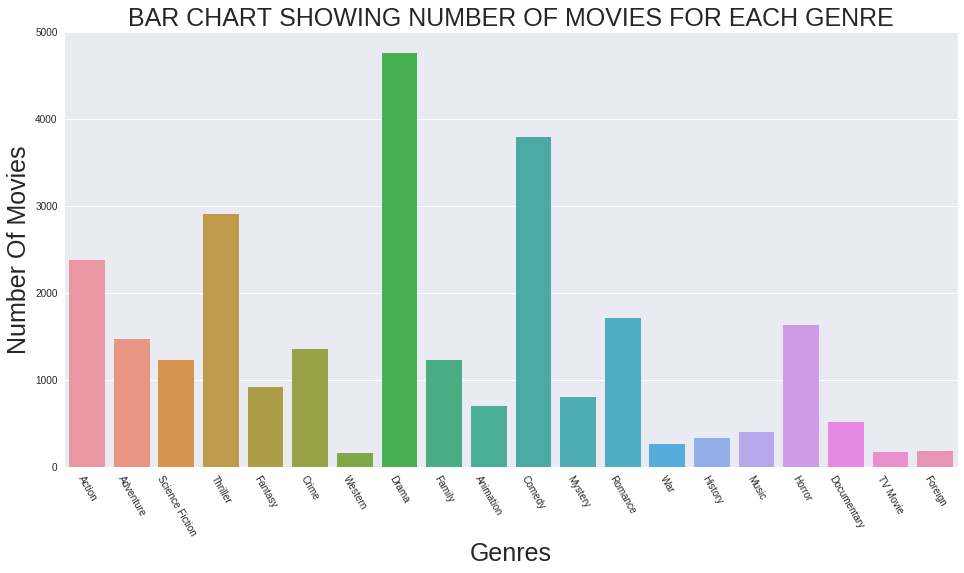

In [14]:
#Bar plot to show the counts for movies across various genres


plt.subplots(figsize=(16, 8))
sns.countplot(x='genres', data=df_genre_combined)
plt.xticks(rotation=-60)
plt.title('BAR CHART SHOWING NUMBER OF MOVIES FOR EACH GENRE',fontsize=25)
plt.xlabel('Genres',fontsize=25)
plt.ylabel('Number Of Movies',fontsize=25)

> From the above bar chart we can clearly see that Action, Thriler, Drama and Comedy genre have more than 2000 movies each with Drama being the highest having more than 4000 moies. Western, War, History, Music, Tv Movie, Foreign genre have the least number of movies

 ### How are the revenue across each genre distributed in the year 2015?

> For answering the above question lets construct a swam plot between the variables revene and genres. Here in this case revenue is a quantitative variable and genres is a categorical variable. So it is better to visualize the relationship using swarmplot.

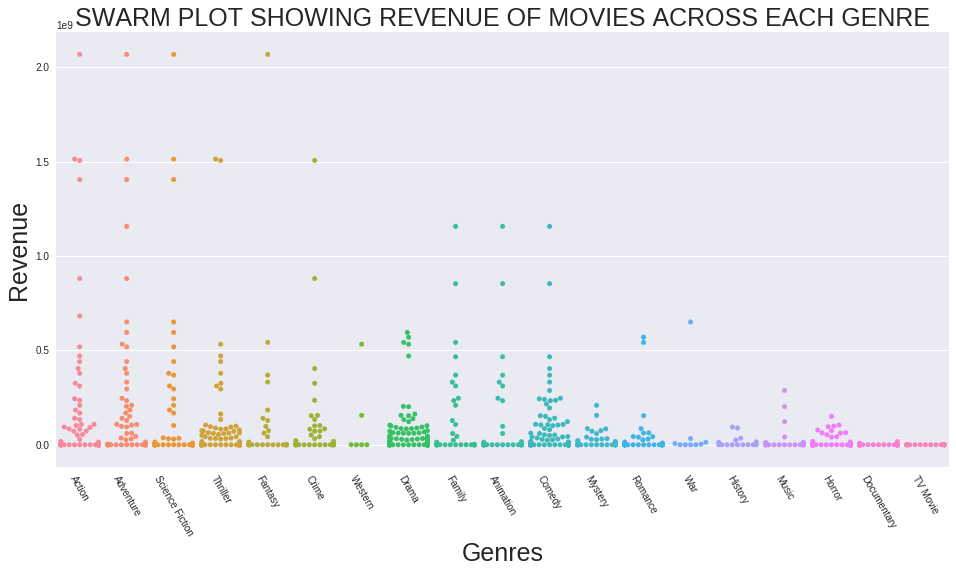

In [32]:
#swarmplot between genres and revenue
plt.subplots(figsize=(16, 8))
sns.swarmplot(x="genres", y="revenue", data=df_genre_combined.query('release_year==2015'))
plt.xticks(rotation=-60)
plt.title('SWARM PLOT SHOWING REVENUE OF MOVIES ACROSS EACH GENRE',fontsize=25)
plt.xlabel('Genres',fontsize=25)
plt.ylabel('Revenue',fontsize=25)

> From the above swarm plot we can see how the revenue is distributed across each genre.

### Overall which genre has generated more revenue and which is the least compared to the budget?

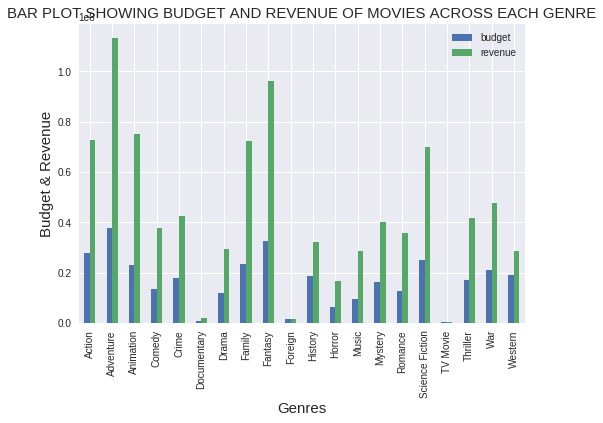

In [15]:
#setting figure size
plt.figure(figsize=(15,10))
#getting the mean of the budget amount grouping on the genres 
s_genres_budget=df_genre_combined.groupby(df_genre_combined['genres'])['budget'].mean()
#getting the mean of the revenue amount grouping on the genres 
s_genres_revenue=df_genre_combined.groupby(df_genre_combined['genres'])['revenue'].mean()
#creating new dataframe concatinating both the series created in the above steps
df_genres=pd.concat([s_genres_budget, s_genres_revenue], axis=1)
df_genres.plot(kind='bar')
plt.title('BAR PLOT SHOWING BUDGET AND REVENUE OF MOVIES ACROSS EACH GENRE',fontsize=15)
plt.xlabel('Genres',fontsize=15)
plt.ylabel('Budget & Revenue',fontsize=15)

> From the above bar plot we can see that the Adventure genre has generated more revenue. TV Movie genre has generated the least revenue.

### What is the relationship between revenue and vote_average of the movies?

> To answer the above question lets try to plot a scatter plot between the quantitative variable revenue and quantitative variable vote_average.

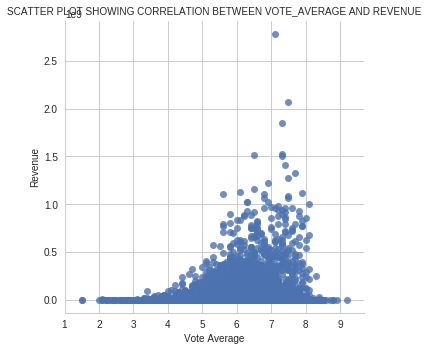

In [16]:
#scatter plot using seaborn between two variables
sns.set_style('whitegrid')
sns.lmplot(x='vote_average',y='revenue',data=df_extract,fit_reg=False)
plt.title('SCATTER PLOT SHOWING CORRELATION BETWEEN VOTE_AVERAGE AND REVENUE',fontsize=10)
plt.xlabel('Vote Average',fontsize=10)
plt.ylabel('Revenue',fontsize=10)


From the above plot we can see that high revenue movies are associated with higher vote_average from users. Good movies are generally rated better and obviously the revenue generated by those movies will be higher. Though in some cases we can see that the movies which are rated very high have generated very low revenue. But movies which are rated very low as less than 5 have always generated a lower revenue.

### What is the effect of runtime of the movies on the revenue generated by the movies?

> To answer the above question lets plot a scatter plot between runtime and the revenue.

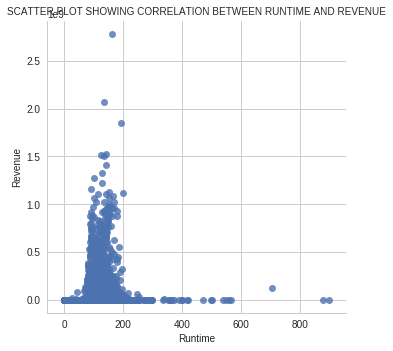

In [17]:
#scatter plot using seaborn between runtime and revenue
sns.set_style('whitegrid')
sns.lmplot(x='runtime',y='revenue',data=df_extract,fit_reg=False)
plt.title('SCATTER PLOT SHOWING CORRELATION BETWEEN RUNTIME AND REVENUE',fontsize=10)
plt.xlabel('Runtime',fontsize=10)
plt.ylabel('Revenue',fontsize=10)

> From the above plot we can see that movies having runtime between around 80 and 200 minutes have generated more revenue whereas movies longer than 200 minutes are less and have generated very less revenue.Movies less than 80 minutes also have generated very less revenue.  

### What is the trend of budget, popularity and vote average of the movies over the years?

> To answer the above question lets plot a line chart showing trend of budget, popularity and vote_average. To achieve this we need to get the mean of the corresponding values grouping on the release year and then plot a line chart.

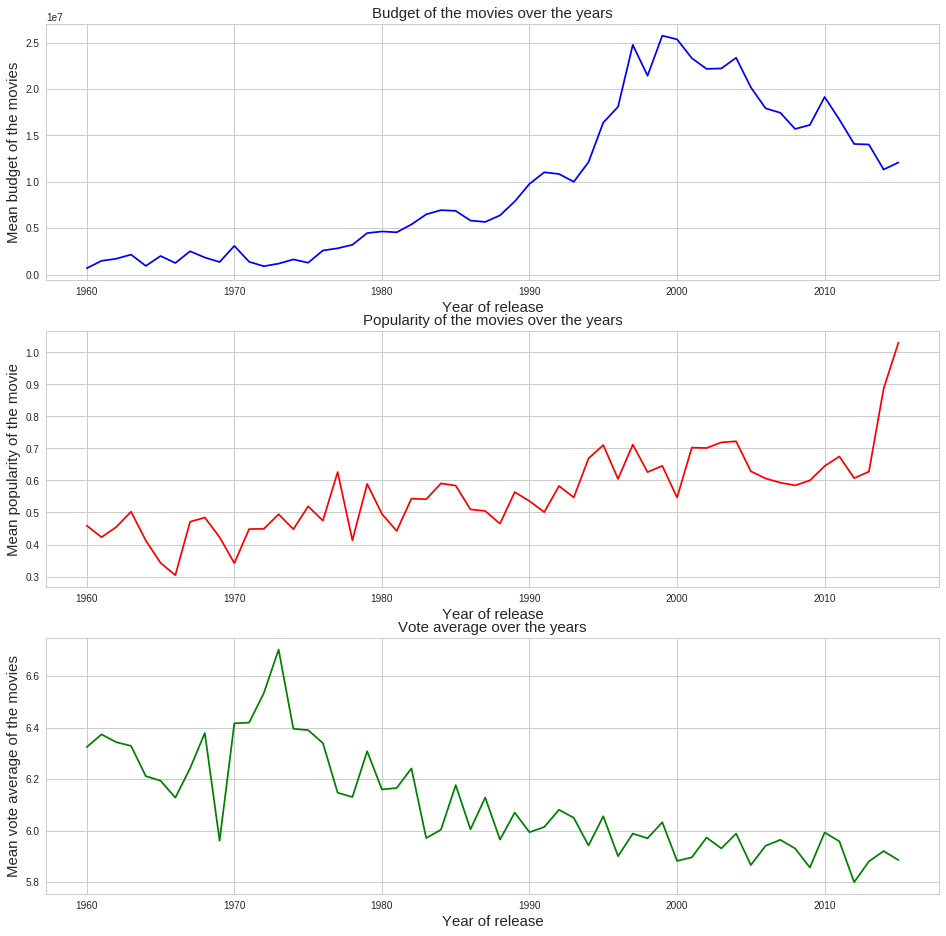

In [18]:
df_budget_mean_grp_by_year=df_extract.groupby(df_extract['release_year'])['budget'].mean()
df_popularity_mean_grp_by_year=df_extract.groupby(df_extract['release_year'])['popularity'].mean()
df_vote_average_mean_grp_by_year=df_extract.groupby(df_extract['release_year'])['vote_average'].mean()
df_vote_average_mean_grp_by_year

plt.figure(figsize=(16,16))

plt.subplot(311)
plt.plot(df_budget_mean_grp_by_year,color='blue')
plt.title('Budget of the movies over the years',fontsize=15)
plt.xlabel('Year of release',fontsize=15)
plt.ylabel('Mean budget of the movies',fontsize=15)

plt.subplot(312)
plt.plot(df_popularity_mean_grp_by_year,color='red')
plt.xlabel('Year of release',fontsize=15)
plt.ylabel('Mean popularity of the movie',fontsize=15)
plt.title('Popularity of the movies over the years',fontsize=15)

plt.subplot(313)
plt.plot(df_vote_average_mean_grp_by_year,color='green')
plt.title('Vote average over the years',fontsize=15)
plt.xlabel('Year of release',fontsize=15)
plt.ylabel('Mean vote average of the movies',fontsize=15)
plt.show()

> Above charts give the trends showing budget, popularity and vote_average over the years. We can see that while budget and popularity show almost increasing trend vote_average shows a decreasing trend.

> Lets summarize the vote_average using histogram.

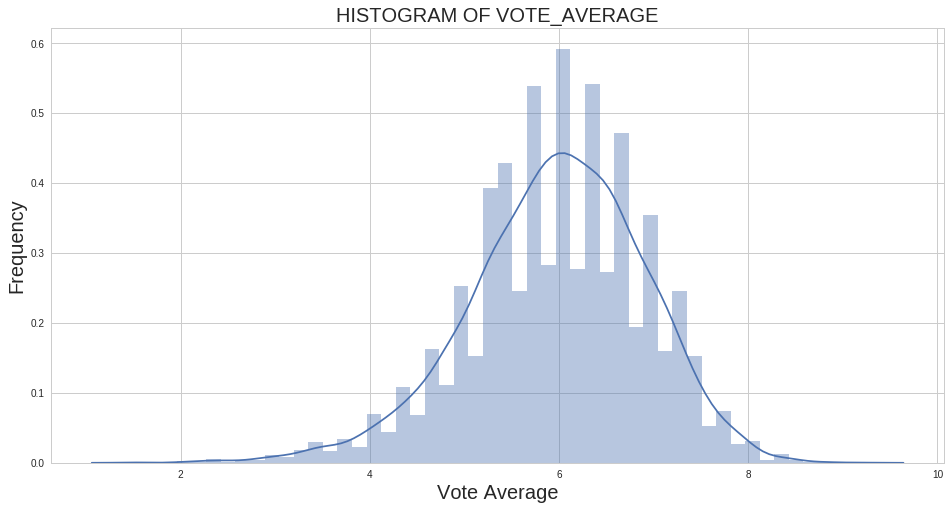

In [19]:
plt.subplots(figsize=(16, 8))
sns.distplot(df_extract.vote_average)
plt.title('HISTOGRAM OF VOTE_AVERAGE',fontsize=20)
plt.xlabel('Vote Average',fontsize=20)
plt.ylabel('Frequency',fontsize=20)

> From the above plot we can see that the shape of the histogram is symmetric and is bell shaped. It is an unimodal distribution.

<a id='conclusions'></a>
## Conclusions

> To answer the questions we had posed on the dataset we had to clean the dataset. Firstly we found that the genre column had multiple values split by pipe symbol. Inorder to answer the question we had to split the genre column into multiple rows which could be joined with the original dataframe. Also the genre column had 23 na or null values. Compared to the total number of genre values 23 is very less so decided to drop those null values. This should not affect the analysis and the questions we are trying to answer since the number of rows are very less and are completely dropped when we do the inner join. There was only one duplicate record which was dropped.

> From the above we can see that the Adventure and Fantasy genre has generated more revenue that any other genres. The least revenue generator is the TV Movie genre and Documentry which is very obvious.

> Also movies with higher vote average tend to have higher revenue. That does not mean higher vote average is the reason for high revenue. It could be that movies which are good in contend tend to earn more revenue and aslo been rated good by the user.

> Also we found that the budget and popularity of movies have been increasing over the years but the vote_average for the movies have been decreasing. That could be because the quality of the movies have come down but may also because the number of movies have increased over the years and hence the average is less. If the number of movies have been same over the years then this could have given more better picture for analysis. 

In [20]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0